# Task 2: Text Analysis of User Reviews:
#### Balaji
#### Harini
#### Jannavi
#### Pavan
#### Ruma Mukherjee (1192073)

In [29]:
import pandas as pd
import seaborn as sns

## I. DataSet: User Reviews of the following 3 cars are collected:
##### 1. Kia Seltos
##### 2. Jeep Compass
##### 3. MG Hector

Initially the reviews from sites carwale.com and caredekho.com was taken separately and analyzed. It was found that the representation of negative feedback from either of the sets was not enough. Hence, to ensure sufficient presence of the key subgroup(group with negative feedback) the set of negative feedbacks from cardekho.com has been added to the set of all reviews obtained from carwale.com.

The analysis is based on the above dataset.

The data was scraped and stored as csv files in the local file system. The dataframes df_reviews_Kia, df_reviews_Jeep, df_reviews_MG read the CSV files as pandas dataframe for the cars Kia Seltos, Jeep Compass and MG Hector respectively.

All the three dataframes are finally combined to a single pandas data frame df_reviews with an added column 'm_type' which can take 3 possible values('Kia','Jeep','MG') for the three types of cars respectively
Details on data collected is covered in the data collection notebook. 

In [54]:
df_reviews_Kia = pd.read_csv('data/Car-rating-Kia_total.csv')
df_reviews_Jeep = pd.read_csv('data/Car-rating-Jeep_total.csv')
df_reviews_MG = pd.read_csv('data/Car-rating-MG_total.csv')

In [55]:
df_reviews_Kia['m_Type'] = 'Kia'
df_reviews_Jeep['m_Type'] = 'Jeep'
df_reviews_MG['m_Type'] = 'MG'

df_reviews = pd.concat([df_reviews_Kia, df_reviews_Jeep, df_reviews_MG])



## II. Categories of Reviews:
The reviews obtained for all the car types have been divided into the following categories:
#### 1. Positive Review Category
#### 2. Negative Review Category
Reviews for which the ratings are 1 and 2 fall in the category of 'Negative Reviews'. Reviews for which the ratings are 4 and 5 belong to the 'Positive Review' category. For each type of car separate dataframes for Positive and Negative categories are formed so that we can analyze the Strong and Weak reviews of each car separately. 

In [34]:
pos_cond_Kia = (df_reviews['Star-Rating'] >= 4) & (df_reviews['m_Type'] == 'Kia')
pos_cond_Jeep = (df_reviews['Star-Rating'] >= 4) & (df_reviews['m_Type'] == 'Jeep')
pos_cond_MG = (df_reviews['Star-Rating'] >= 4) & (df_reviews['m_Type'] == 'MG')

neg_cond_Kia = (df_reviews['Star-Rating'] <= 2) & (df_reviews['m_Type'] == 'Kia')
neg_cond_Jeep = (df_reviews['Star-Rating'] <= 2) & (df_reviews['m_Type'] == 'Jeep')
neg_cond_MG = (df_reviews['Star-Rating'] <= 2) & (df_reviews['m_Type'] == 'MG')

## III. Initial View of Data:
An initial view of data indicates that we have taken around 793 total data points for our analysis out of which each category has around 250 to 300 rows of data. The three types of car has almost equal or comparable representation as can be seen in the bar chart below. Other than very few missing values in the Date column of dataset, data of all the other columns have complete non-null data.

Graph plottinf library *seaborn* is used for the appropriate visual represnetation of the data.

It can be seen that majority of the reviews are rated as 5. The low rated reviews have a low representation in the sample set collected. This is representative of the overalll star ratings of the reviews in the sites. It shows that all the three types of cars are perceived by and large positively among the reviewers.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 303
Data columns (total 5 columns):
Review-Text    793 non-null object
Review-Date    776 non-null object
Star-Rating    793 non-null int64
Web-Site       793 non-null object
m_Type         793 non-null object
dtypes: int64(1), object(4)
memory usage: 57.2+ KB


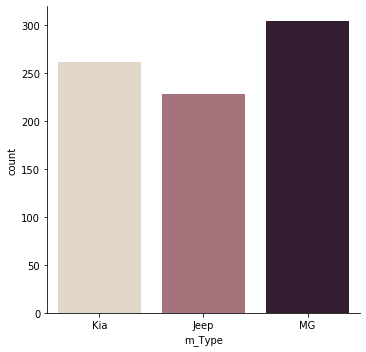

In [40]:
#Initial View of the data
sns.catplot(x="m_Type", kind="count", palette="ch:.25", data=df_reviews);
df_reviews.info()

Percentage of data points belonging to each type rating 
m_Type  Star-Rating
Jeep    5              0.504386
        4              0.219298
        1              0.166667
        2              0.057018
        3              0.052632
Kia     5              0.455939
        1              0.168582
        4              0.130268
        2              0.122605
        3              0.122605
MG      5              0.611842
        3              0.121711
        4              0.111842
        1              0.105263
        2              0.049342
Name: Star-Rating, dtype: float64


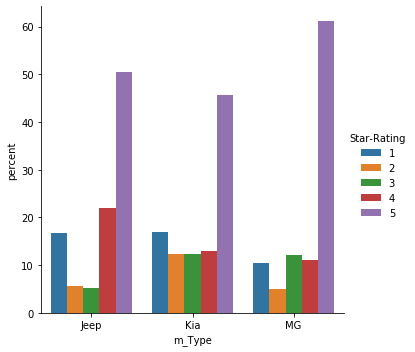

In [42]:
print("Percentage of data points belonging to each type rating ")
df_tmp = df_reviews.groupby('m_Type')['Star-Rating'].value_counts(normalize=True)
print(df_tmp)

x,y = 'm_Type', 'Star-Rating'
df_reviews.groupby(x)[y].value_counts(normalize=True).mul(100)\
.rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')

# IV. Sentiment Analysis
Sentiment Analysis has been done using Vader. Vader stands for Valency Aware Dictionary and sEntiment Reasoner. It is specifically used for sentiments expressed in social media and hence the choice. It is a lexican and rule based analysis tool.
The sentiment analysis is run over the reviews of the three types of cars on the raw review text. This is intentional so as not to lose the effect of punctuation marks and special characters (e.g emojis, uppercase emphasis, exclamation marks etc) which are significant ways of expressing human emotions.

The polarity of the sentiments of the user across different star ratings have been obtained and appropriate representaion has been given using the seaborn plots. The compounded sentiments have been highlighted which means that the overall opinion about the different cars are captured.

The following are the observations which are worth noting:
1. The intensity of positive emotions of Jeep Compass and MG Hector are almost similar and somewhat better than Kia Seltos
2. The negative emotions, however, are more intense for Jeep Compass and quite mild for MG Hector 


In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import matplotlib.pyplot as plt

In [57]:
analyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    sentence = str(sentence)
    score = analyzer.polarity_scores(sentence)
    return score
    #print("{:-<40} {}".format(sentence, str(score)))

In [58]:
# Just run things on the raw text itself. Note that punctuation affects sentiment scores
df_reviews['m_Sentiment_Score'] = df_reviews['Review-Text'].apply(lambda x: (sentiment_analyzer_scores(x))['compound'])

[Text(0, 0.5, 'Sentiment Score'),
 Text(0.5, 0, 'Car Type'),
 Text(0.5, 1.0, 'Sentiment Scores by Car Type for different Star Ratings')]

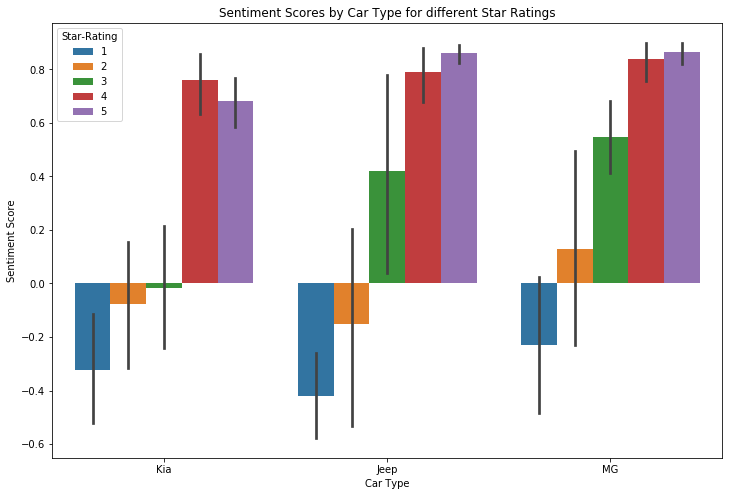

In [59]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(ax=ax, x='m_Type', y='m_Sentiment_Score', hue='Star-Rating', data=df_reviews)

ax.set(xlabel='Car Type', ylabel='Sentiment Score', title='Sentiment Scores by Car Type for different Star Ratings')


# V. N-Gram Analysis
n-gram analysis gives the contiguous sequence of n items in a sentence. We have experimented with n=2,3,4,5 for our use case to come out with relevant insights in the data.
With n-gram analysis we try to answer the follwoing questions:
    - What are our customers saying about the cars?
    - What do the customers who give positive review mostly say ?
    - What do the customers who give negative reviews mostly say ?
    
This analysis would lead to Actionable Insights.

NLTK library has been used to do the n-gram analysis.

In the process the clean and consolidated review data has been saved in the file *Car-Reviews-cleaned_consolidated.csv* 

Some of the important phrases which come out as we visualize the dominant n-grams from the positive(+) and negative(-) reviews of each car separately are as follows:


*For Car Kia Seltos:*
1. +ve phrases: **'value money', 'driving experience','boot space', 'looking good', 'features good', 'back seats', 'head rest'**  
2. -ve phrases: **'2 airbags','plastic quality', 'lacks sunroof price back seats', 'hope fix problem soon', 'design really low quality', 'low quality compared creta'**

 
*For Car Jeep Compass:*
1. +ve phrases: **'buying experience', 'riding experience','value money', 'safety features', 'cruise-control','build quality','good looking','driving experience', 'seat comfort','speed duct', 'interior quality top notch', 'system auto snow sand mud'**
2. -ve phrases: **'average mileage' , 'service center','tyre got burst'** 
   
   
*For Car MG Hector:*
1. +ve phrases: **'value money', 'price range','riding experience','buying experience','boot space','driving experience' 'exterior interior awesome', 'interior awesome engine', 'best car ever seen'**
2. -ve phrases: **'poor quality','poor build','refine engine according indian', 'variety features help issue', 'engine long run mg still', 'disliked car expectations high car','high car mark poor build'**   

A perusal of the above results demonstrates that the intent of the reviewers is self-evident. Some deeper observations are that competetor names as well as strong and weak features of the cars are expressed by the reviewers.

In [114]:
import collections
import re
import sys
import time
import nltk

from nltk.corpus import stopwords
from nltk import FreqDist
nltk.download('stopwords') # run this one time
stop_words = stopwords.words('english')
stop_words.extend(['car', 'kia', 'seltos', 'hector', 'mg','jeep','compass']) 

def pre_process(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    word_list = re.findall(r'\w+', string.lower())
    filtered_words = [word for word in word_list if word not in stop_words]
    return filtered_words


def count_ngrams(lines, min_length=2, max_length=5):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        line = str(line)
        for word in pre_process(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=300, height= 300,max_words= 200,max_font_size=40, relative_scaling=.5).generate(' '.join(words))
    plt.figure(figsize=(10, 10))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

# Store the cleaned text into m_Review-Text_clean
cleaned_text_colname = 'm_Review-Text_clean'
df_reviews[cleaned_text_colname] = df_reviews['Review-Text'].apply(lambda x: " ".join(pre_process(x)))

# Save the cleaned consolidated review data into a CSV file
df_reviews.to_csv(r"Car-Reviews-cleaned_consolidated.csv",index=False)

#Reference : Utility functions if this cell has been taken from https://gist.github.com/benhoyt/dfafeab26d7c02a52ed17b6229f0cb52

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
# mfr => Most Frequent in Reviews

mfr_Kia_pos = count_ngrams(df_reviews[pos_cond_Kia]['Review-Text'],min_length=2, max_length=3)
print("===== Kia Seltos POSITIVE =====")
print_most_frequent(mfr_Kia_pos, num= 10)
mfr_Kia_neg = count_ngrams(df_reviews[neg_cond_Kia]['Review-Text'],min_length=2, max_length=3)
print("===== Kia Seltos NEGATIVE =====")
print_most_frequent(mfr_Kia_neg, num= 10)

mfr_Jeep_pos = count_ngrams(df_reviews[pos_cond_Jeep]['Review-Text'],min_length=2, max_length=3)
print("===== Jeep Compass POSITIVE =====")
print_most_frequent(mfr_Jeep_pos, num= 10)
mfr_Jeep_neg = count_ngrams(df_reviews[neg_cond_Jeep]['Review-Text'],min_length=2 ,max_length=3)
print("===== Jeep Compass NEGATIVE =====")
print_most_frequent(mfr_Jeep_neg, num= 10)

mfr_MG_pos = count_ngrams(df_reviews[pos_cond_MG]['Review-Text'],min_length=2,max_length=3)
print("===== MG Hector POSITIVE =====")
print_most_frequent(mfr_MG_pos, num= 10)
mfr_MG_neg = count_ngrams(df_reviews[neg_cond_MG]['Review-Text'],min_length=2,max_length=3)
print("===== MG Hector NEGATIVE =====")
print_most_frequent(mfr_MG_neg, num= 10)

===== Kia Seltos POSITIVE =====
----- 10 most common 2-grams -----
value money: 23
test drive: 11
price range: 9
driving experience: 8
gt line: 8
boot space: 8
looking good: 7
features good: 7
1 5: 6
petrol engine: 6

----- 10 most common 3-grams -----
best value money: 3
took test drive: 3
1 5 diesel: 3
good value money: 3
mid size suv: 2
within 11 lakh: 2
11 lakh budget: 2
price range people: 2
offer 6 airbags: 2
able provide support: 2

===== Kia Seltos NEGATIVE =====
----- 10 most common 2-grams -----
test drive: 12
top end: 10
top model: 10
high price: 7
1 5: 6
model price: 6
2 airbags: 5
plastic quality: 5
read good: 5
tata harrier: 5

----- 10 most common 3-grams -----
1 5 petrol: 3
get basic features: 2
assist traction control: 2
interiors top end: 2
version test drive: 2
taken test drive: 2
took test drive: 2
hope fix problem: 2
fix problem soon: 2
top end variant: 2

===== Jeep Compass POSITIVE =====
----- 10 most common 2-grams -----
buying experience: 23
riding experience: 

# VI. Attributes and Emotional Correlation

Based on the n-gram results a few phrases corresponding to meaningful features and attributes of the car have been selected, namely:**'value money','buying experience','price','driving experience', 'look', 'features', 'quality', 'safety', 'mileage', 'performance','exterior interior','build'**

The average sentiment score of reviews featuring these phrases has been computed for the three car types. This would help us understand the comparative strengths and weaknesses of the car types based on particular features and attributes in this car segment


In [133]:
def checkStringExists(text, pattern):
    #text = text.lower()
    return pattern in text

ATTRIBS = ["build quality", "driving experience"]
ATTRIBS = ["value money","buying experience","driving experience", "look", "good features", "quality", "safety features", "mileage" , "performance" , "exterior interior", "build"]
for ATTRIB in ATTRIBS:
   print("Attribute: ", ATTRIB)
   print(df_reviews[df_reviews['m_Review-Text_clean'].apply(lambda x: checkStringExists(str(x), ATTRIB ))].groupby('m_Type')['m_Sentiment_Score'].mean())

Attribute:  value money
m_Type
Jeep    0.931264
Kia     0.861900
MG      0.822612
Name: m_Sentiment_Score, dtype: float64
Attribute:  buying experience
m_Type
Jeep    0.544396
Kia     0.936400
MG      0.881819
Name: m_Sentiment_Score, dtype: float64
Attribute:  driving experience
m_Type
Jeep    0.698663
Kia     0.708473
MG      0.931446
Name: m_Sentiment_Score, dtype: float64
Attribute:  look
m_Type
Jeep    0.826016
Kia     0.543943
MG      0.771916
Name: m_Sentiment_Score, dtype: float64
Attribute:  good features
m_Type
Jeep    0.950900
Kia     0.687914
MG      0.938467
Name: m_Sentiment_Score, dtype: float64
Attribute:  quality
m_Type
Jeep    0.642346
Kia     0.256760
MG      0.422371
Name: m_Sentiment_Score, dtype: float64
Attribute:  safety features
m_Type
Jeep    0.88127
Kia     0.20595
MG      0.94240
Name: m_Sentiment_Score, dtype: float64
Attribute:  mileage
m_Type
Jeep    0.550983
Kia     0.226991
MG      0.488279
Name: m_Sentiment_Score, dtype: float64
Attribute:  performance

# VII. Topic Modeling using LDA
## a. Methodology

Although the n-gram analysis in the previous section has given us valuable information it is worthwhile to carry out a more advances state of the art analysis via topic modeling techniques that have the potential to bring out deeper themes across the entire corpus of reviews.

Topic modeling has been carried out through the LDA using the *gensim* library. Latent Dirichlet Allocation (LDA) is a statistical modeling technique used to bring out the abstract topics that occur in the collection of reviews used in this analysis. A trigram model has been utilized. 

Positive and Negative reviews have been considered separately to understand the *Strong* and *Weak* features, attributes etc. which are discussed by the reviewers for each type of car. The results have been summarized visually in the form of word clouds for each respective group. 

After some experimentation, the number of topics in each category was set at 2. This also produced satisfactory perplexity and coherence scores which establishes the statistical robustness. 

The raw text was pre-processed using the standard techniques of tokenization, punctuation removal, lower casing, stop word removal, lemmatization. NLTK was used for stop word removal and SpaCy was used for lemmatization.


In [77]:
corpus_Kia_raw_pos = df_reviews[pos_cond_Kia]['Review-Text'].tolist()
corpus_Kia_raw_neg = df_reviews[neg_cond_Kia]['Review-Text'].tolist()

corpus_Jeep_raw_pos = df_reviews[pos_cond_Jeep]['Review-Text'].tolist()
corpus_Jeep_raw_neg = df_reviews[neg_cond_Jeep]['Review-Text'].tolist()

corpus_MG_raw_pos = df_reviews[pos_cond_MG]['Review-Text'].tolist()
corpus_MG_raw_neg = df_reviews[neg_cond_MG]['Review-Text'].tolist()

In [78]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [107]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['car', 'kia', 'seltos', 'hector', 'mg','jeep','compass']) 

In [108]:
def process_data(data_in, num_topics, retainUnigrams=False, useTrigramModel=False):
  data_words = list(sent_to_words(data_in))

  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=1, threshold=2) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], min_count=1, threshold=2)  

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)
    
  # Remove Stop Words
  data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words_nostops, bigram_mod)
  if(not retainUnigrams):
      data_words_bigrams = [[x for x in doc if '_' in x] for doc in data_words_bigrams]  # Keep only bigrams

  data_words_trigrams = make_trigrams(data_words_nostops,bigram_mod, trigram_mod)

  if(not retainUnigrams):
      data_words_trigrams = [[x for x in doc if '_' in x] for doc in data_words_trigrams] # Keep bigrams and trigrams

  if(useTrigramModel):
      data_words_ngrams = data_words_trigrams
  else:
      data_words_ngrams = data_words_bigrams

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(nlp, data_words_ngrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  #print("corpus sample", corpus[:5])

  # Human readable format of corpus (term-frequency)
  [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

  ##### Build LDA model
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                             id2word=id2word,
                                             num_topics=num_topics, 
                                             random_state=100,
                                             update_every=1,
                                             chunksize=100,
                                             passes=10,
                                             alpha='auto',
                                             per_word_topics=True)

  # Print the Keywords in the topics
  print("LDA model topics")
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

  # Compute Perplexity
  print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)

  show_word_clouds(lda_model, num_topics)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, bigram_mod, trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(nlp, texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def show_word_clouds(lda_model, num_topics):
  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=stop_words,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=40,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = lda_model.show_topics(formatted=False)

  fig, axes = plt.subplots(num_topics//2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  plt.show()

#Ref:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#8tokenizewordsandcleanuptextusingsimple_preprocess

# VII. Topic Modeling using LDA
## b. Insights

The two topics in each of the Strong and Weak categories per car type are seen to be thematic of the following:
1. Overall holistic user experience and emotional connect/disconnect
2. Positive/Negative experiences concerned with more specific features or attributes of the car

Some of the important insights derived from the Topic Modeling exercise for each types of car is listed below:

*For Kia Seltos:*

1. Positives/Strengths:

-The holistic user experience theme captures 'amazing features', 'good driving experience', 'good look', 'customer care', 'best car'.

-Specific aspects that emerge are 'boot_space', 'head_rest', 'back_seat', 'electric_variant', 'good_mileage', 'price_range'.

2. Negatives/Weaknesses:

-People are report negative experience on the 'built quality', 'cosmetic_features', 'beige_interiors', 'premium_feature', 'brake_assist', fitment in 'india market', 'priced_car','really_low'

-Often a mention of the comparable "Jeep" are noticed in the negative reviews


Of particular significance from market development point of view are phrases like 'india_market', 'electric_variant' which would be actionable insights that require further marketing analysis.

*For Jeep Compass*

1. Positives/Strengths:

-The holistic user experience theme captures 'ride_quality', 'riding_experience', 'driving_experience', 'good_looke', 'fuel_efficiency','rear_passenger' 

-Specific aspects that emerge are 'wheel_drive', 'safety_feature', 'effective_braking', 'electronic_parking_brake', 'auto_snow', 'cruise_control'
  
2. Negatives/Weaknesses:

-People are not happy about the 'jeep_india_team', 'service_centre', sutitability to 'indian_road', 'average_mileage', 'long_wait'. They feel it is a 'faulty_vehicle' with complains on 'fuel_pump', 'basic_feature', 'build_quality', 'battery' and 'top_end' features.

*For MG Hector*

1. Positives/Strengths:

-The holistic user experience theme captures good 'riding_experience', 'fuel_economy', 'service_cost'. They feel the car  'gives_lot', 'looks_awesome', 'feature_loaded'. It is recognized as the 'dream_car'. "best_car", 'amazing_car'

-Specific aspects that emerge are "voice_command","many_feature", "connected_car",'internet_car'

2. Negatives/Weaknesses:

-People are not happy mostly about the 'poor_quality_interior', 'chinese_car', 'mark_poor_build_quality', 'price_range', 'cheap_quality', 'poor mileage'. Perhaps they expected 'much_better' features and are 'heart_broken' 

-Specific aspects for a negative review include 'clutch_plate','voice_command'




Kia Seltos: Strong/Positive Topic Summaries:
---------------------------------------------

LDA model topics
[(0,
  '0.054*"extremely_nice" + 0.049*"looking_good" + 0.043*"feel_comfortable" + '
  '0.043*"amazing_feature" + 0.037*"head_rest" + 0.037*"back_seat" + '
  '0.037*"electric_variant" + 0.033*"little_bit" + 0.032*"good_performance" + '
  '0.027*"riding_experience"'),
 (1,
  '0.074*"driving_experience" + 0.062*"boot_space" + 0.051*"price_range" + '
  '0.038*"india_market" + 0.036*"good_mileage" + 0.034*"sales_service" + '
  '0.027*"years_warranty" + 0.027*"indian_market" + 0.027*"space_good" + '
  '0.024*"diesel_version"')]

Perplexity:  -4.85913987015374

Coherence Score:  0.7401385891630046


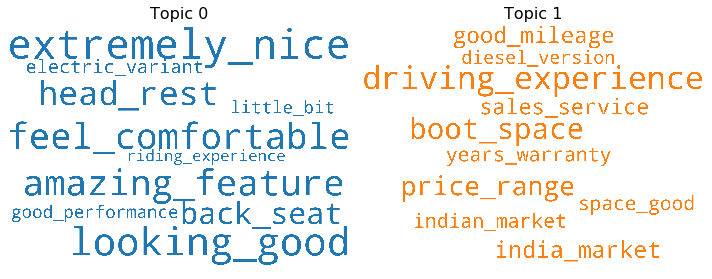

Kia Seltos: Weak/Negative Topic Summaries:
---------------------------------------------

LDA model topics
[(0,
  '0.095*"premium_feature" + 0.068*"top_variant" + 0.068*"really_low" + '
  '0.068*"brake_assist" + 0.068*"diesel_version" + 0.068*"driving_experience" '
  '+ 0.068*"htk_petrol_version" + 0.041*"fancy_feature" + '
  '0.041*"diesel_automatic" + 0.041*"traction_control"'),
 (1,
  '0.126*"test_drive" + 0.095*"top_end" + 0.068*"pricy_feature_full" + '
  '0.068*"indian_market" + 0.067*"worst_experience" + 0.067*"built_quality" + '
  '0.067*"beige_interiors" + 0.040*"service_cost" + 0.040*"looks_good" + '
  '0.040*"plastic_quality"')]

Perplexity:  -3.863788764761842

Coherence Score:  0.7798307847362461


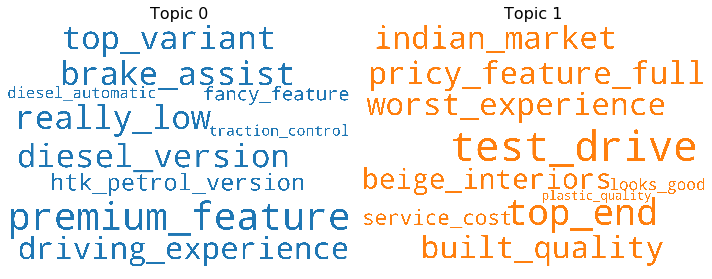

In [109]:
print("Kia Seltos: Strong/Positive Topic Summaries:")
print("---------------------------------------------\n")
process_data(corpus_Kia_raw_pos, 2, useTrigramModel=True)
print("Kia Seltos: Weak/Negative Topic Summaries:")
print("---------------------------------------------\n")
process_data(corpus_Kia_raw_neg, 2, useTrigramModel=True)
#process_data(corpus_Kia_raw, 4, retainUnigrams=True, useTrigramModel=True )

LDA model topics
[(0,
  '0.037*"jeep_compass" + 0.029*"ride_quality" + 0.028*"riding_experience" + '
  '0.027*"driving_experience" + 0.024*"cruise_control" + 0.024*"segment_jeep" '
  '+ 0.024*"much_better" + 0.020*"good_looke" + 0.019*"fuel_efficiency" + '
  '0.019*"rear_passenger"'),
 (1,
  '0.059*"best_car" + 0.043*"jeep_compass" + 0.029*"wheel_drive" + '
  '0.029*"safety_feature" + 0.029*"long_drive" + 0.025*"effective_braking" + '
  '0.022*"looks_performance" + 0.021*"electronic_parking_brake" + '
  '0.020*"driver_car" + 0.016*"auto_snow"')]

Perplexity:  -5.1618453412252

Coherence Score:  0.5594909187305426


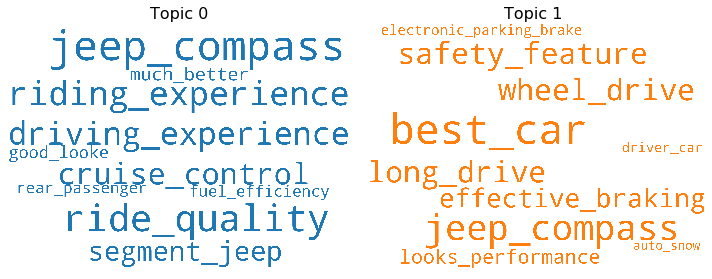

LDA model topics
[(0,
  '0.131*"jeep_compass" + 0.034*"jeep_india_team" + 0.034*"service_centre" + '
  '0.034*"indian_road" + 0.025*"service_center" + 0.024*"fuel_pump" + '
  '0.024*"much_hippe" + 0.024*"faulty_vehicle" + 0.024*"fuel_pump_failed" + '
  '0.024*"july_still"'),
 (1,
  '0.050*"basic_feature" + 0.045*"build_quality" + 0.036*"battery_went" + '
  '0.036*"bought_jeep" + 0.036*"years_warranty" + 0.036*"better_option" + '
  '0.036*"average_mileage" + 0.035*"service_center" + '
  '0.028*"purchased_jeep_compass_limited" + 0.022*"top_end"')]

Perplexity:  -4.477516072491805

Coherence Score:  0.6007866671385538


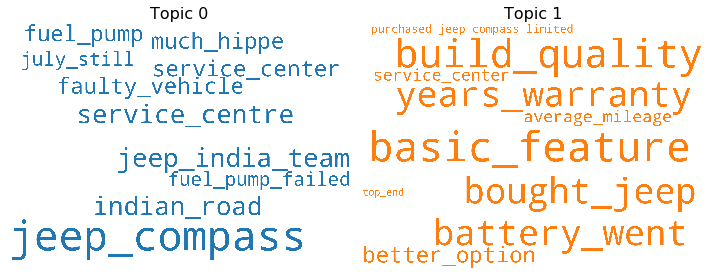

In [87]:
print("Jeep Compass: Strong/Positive Topic Summaries:")
print("---------------------------------------------\n")
process_data(corpus_Jeep_raw_pos, 2, useTrigramModel=True)
print("Jeep Compass: Weak/Negative Topic Summaries:")
print("---------------------------------------------\n")
process_data(corpus_Jeep_raw_neg, 2, useTrigramModel=True)

MG Hector: Strong/Positive Topic Summaries:
---------------------------------------------

LDA model topics
[(0,
  '0.058*"riding_experience" + 0.044*"gives_lot" + 0.042*"dream_car" + '
  '0.040*"fuel_economy" + 0.039*"service_cost" + 0.036*"well_ride" + '
  '0.036*"looks_awesome" + 0.035*"internet_car" + 0.019*"long_drive" + '
  '0.016*"feature_loade"'),
 (1,
  '0.065*"mg_hector_really" + 0.057*"best_car" + 0.050*"amazing_car" + '
  '0.045*"also_good" + 0.037*"amazing_experience" + 0.037*"voice_command" + '
  '0.037*"connected_car" + 0.028*"many_feature" + 0.028*"little_bit" + '
  '0.019*"nice_car"')]

Perplexity:  -5.307372789355841

Coherence Score:  0.68842120146725


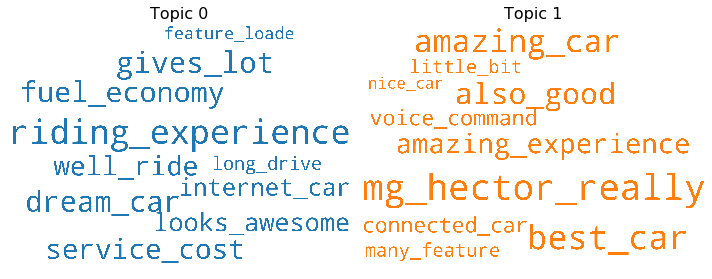

MG Hector: Weak/Negative Topic Summaries:
---------------------------------------------

LDA model topics
[(0,
  '0.085*"cons_lack" + 0.084*"poor_quality_interior" + 0.084*"chinese_car" + '
  '0.084*"much_better" + 0.083*"long_run" + 0.082*"mark_poor_build_quality" + '
  '0.051*"price_range" + 0.051*"pros_look" + 0.051*"voice_command" + '
  '0.050*"cheap_quality"'),
 (1,
  '0.113*"clutch_plate" + 0.112*"road_presence" + 0.076*"worst_car_mg_hector" '
  '+ 0.068*"good_looke" + 0.068*"like_xuv" + 0.068*"mg_motor" + '
  '0.067*"poor_mileage" + 0.064*"dr_hasan_faraz" + 0.064*"heart_broken" + '
  '0.027*"mark_poor_build_quality"')]

Perplexity:  -3.7637443840503693

Coherence Score:  0.775735589352575


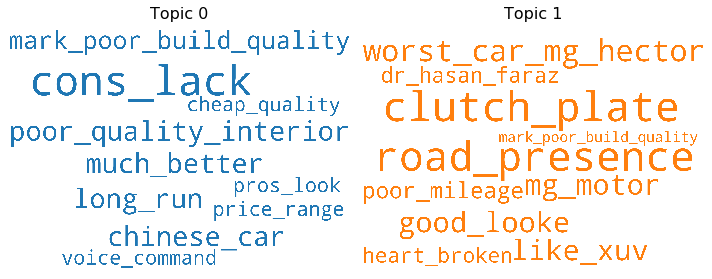

In [95]:
print("MG Hector: Strong/Positive Topic Summaries:")
print("---------------------------------------------\n")
process_data(corpus_MG_raw_pos, 2, useTrigramModel=True)
print("MG Hector: Weak/Negative Topic Summaries:")
print("---------------------------------------------\n")
process_data(corpus_MG_raw_neg, 2, useTrigramModel=True)

# VIII. Named Entity Recognition
To round of the study and supplement the valuable insights already derived from the previous techniques named entity recognition was applied on the positive and negative reviews for each type of car. The goal was to idetinfy competing brands and companies that the reviewers are discussing.

SpaCy was used for the purpose.

The competitive brands for each type can be summarized as below:


Kia:  Creta,Hyundai, Tata,Hyundai,Jeep


MG:  Creta,Kia,Harrier(Tata)

In [20]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [21]:
def top_named_entities(text, top_count):
  doc = nlp(text)
  items = [x.text for x in doc.ents]
  return ",".join([x[0] for x in Counter(items).most_common(top_count)])

In [23]:
combined_text_Kia_pos = df_reviews[pos_cond_Kia]['Review-Text'].str.cat()
print("Kia +ve NE: ", top_named_entities(combined_text_Kia_pos, 20))
combined_text_Kia_neg = df_reviews[neg_cond_Kia]['Review-Text'].str.cat()
print("Kia -ve NE: ", top_named_entities(combined_text_Kia_neg, 20))

combined_text_Jeep_pos = df_reviews[pos_cond_Jeep]['Review-Text'].str.cat()
print("Jeep +ve NE: ", top_named_entities(combined_text_Jeep_pos, 20))
combined_text_Jeep_neg = df_reviews[neg_cond_Jeep]['Review-Text'].str.cat()
print("Jeep -ve NE: ", top_named_entities(combined_text_Jeep_neg, 20))

combined_text_MG_pos = df_reviews[pos_cond_MG]['Review-Text'].str.cat()
print("MG +ve NE: ", top_named_entities(combined_text_MG_pos, 20))
combined_text_MG_neg = df_reviews[neg_cond_MG]['Review-Text'].str.cat()
print("MG -ve NE: ", top_named_entities(combined_text_MG_neg, 20))

Kia +ve NE:  Kia,kia,Indian,India,Creta,first,6,KIA,2,one,Seltos,11,1.5,Hyundai,5,One,1,Kia Seltos,Interior,1.4
Kia -ve NE:  Kia,Kia Seltos,2,India,Creta,3,1,1.5,KIA,first,Seltos,Indian,Tata,Indians,6,kia,Hyundai,Jeep,5,WASTE
Jeep +ve NE:  jeep,Jeep,4,5,2,first,3,Jeep Compass,Compass,one,four,JEEP,1,6,indian,One,three,seven,Indian,six
Jeep -ve NE:  Jeep,Jeep Compass,Tyre,jeep,first,one,India,Jeep India,JEEP,2,15 days,Yamuna Expressway,Bridgestone,Bangalore,1,12,First,Indian,2017,avg
MG +ve NE:  first,one,MG Hector,India,Indian,india,5,Hector,indian,2,3,6,1,Harrier,360,2.0,SUV,1.5,Creta,20
MG -ve NE:  Chinese,India,China,1,2,Jeep,7,MG Hector,UK,one,Hector,10 Days Later,December,Kia,AC,MG,Indian,Worst Car - MG Hector,Harrier,CHINA
